# [HW7] FBA QUANT - FINANCIAL ENGINEERING

Kim Na Young (dudskrla09@gmail.com)

---

### Problem 1. 


Download the spreadsheet [EquityDerivsPractice_PSet3.xlsx](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fd396qusza40orc.cloudfront.net%2Ffe2%2Fclass_resources%2FEquityDerivsPractice_PSet3.xlsx&wdOrigin=BROWSELINK) from the Course platform. It is also uploaded to the Notion. In the second worksheet,“StockPricePaths”, you will find four new price paths for the security. Now answer the following questions:

(a) Compute the annualized realized volatility of the log-returns for price path #1,2,3,4.

(b) Compute the total realized P&L when hedging using price path #1,2,3,4. (Note that the total realized P&L in the “DemoSheet” worksheet is in cell B11. It is the 
final value of the self-financing trading strategy minus the option payoff.)

### Solution 1.

----


### Problem 2. 

Consider the following stock. 

> Time to expiration : 6 months

> Standard deviation : 50% per year

> Exercise price : $50

> Stock price : $50

> Annual interest rate : 3%

> Dividend : 0

(a) Use the Black-Scholes formula to find the value of a call option and put option on the given stock.

(b) Describe what would be the change in the price of the call option if each parameter was changed independently. (Substituting one parameter while keeping the other parameters. Don’t consider about Dividend.)


### Solution 2.

**(a) Use the Black-Scholes formula to find the value of a call option and put option on the given stock.**

- S = $50
- K = $50
- r = 0.03 (= 3%)
- T = 0.5 (= 6 months)
- σ = 0.5 (= 50% per year)
- c = 0

(1) Call option
$$ C = S e^{-cT}N(d_1) - Ke^{-rT}N(d_2) \;\; (\; N(d) = P(N(0,1) ≤ d) \; )$$

$$ (1) \;\; d_1 = \frac{log(\frac{S}{k}) + (r-c+\frac{σ^2}{2})*T}{σ\sqrt{T}} = \frac{log(\frac{\$50}{\$50}) + (0.03-0+\frac{0.5^2}{2})*0.5}{0.5\sqrt{0.5}} $$

$$ (2) \;\; d_2 = d_1 - σ\sqrt{T} = d_1 - 0.5\sqrt{0.5} $$

In [4]:
import math
from scipy.stats import norm

# (0) Define variables
S = 50
K = 50
r = 0.03 
T = 0.5 
sigma = 0.5 
c = 0

# (1) d1
d1 = ( math.log(S/K) + (r - c + (sigma ** 2) / 2) * T ) / ( sigma * math.sqrt(T) )

# (2) d2
d2 = d1 - sigma * math.sqrt(T)

# (3) N(d1)
def N(d):
    return norm.cdf(d, loc=0, scale=1)

N_d1 = N(d1)

# (4) N(d2)
N_d2 = N(d2)

print(f"d1 : {d1} | d2 : {d2}")
print(f"N(d1) : {N(d1)} | N(d2) : {N(d2)}")

d1 : 0.2192031021678297 | d2 : -0.13435028842544408
N(d1) : 0.5867540804663901 | N(d2) : 0.446562794621655


In [3]:
C =  S * math.exp(-c * T) * N_d1 - K * math.exp(-r * T) * N_d2

print(f"The value of call option: {C}")

The value of call option: 7.3419869851043735


(2) Put option

Put option price can be calculated from put-call parity,

$$ P + Se^{-cT} = C + Ke^{-rT} $$

$$ ∴ \; P = C + Ke^{-rT} - Se^{-cT} = Ke^{-rT}(1-N(d_2)) - S e^{-cT}(1-N(d_1)) $$

In [2]:
P =  K * math.exp(-r * T) * (1 - N_d2) - S * math.exp(-c * T) * (1 - N_d1)

print(f"The value of put option: {P}")

The value of put option: 6.597583965257503


**(b) Describe what would be the change in the price of the call option if each parameter was changed independently. (Substituting one parameter while keeping the other parameters. Don’t consider about Dividend.)**

In [5]:
import math
from scipy.stats import norm

def calculate_call_option(S, K, r, T, sigma):
    # (1) d1
    d1 = ( math.log(S/K) + (r - c + (sigma ** 2) / 2) * T ) / ( sigma * math.sqrt(T) )

    # (2) d2
    d2 = d1 - sigma * math.sqrt(T)
    
    # (3) N(d1)
    N_d1 = N(d1)

    # (4) N(d2)
    N_d2 = N(d2)
    
    # (5) C 
    C =  S * math.exp(-c * T) * N_d1 - K * math.exp(-r * T) * N_d2
    return C

def N(d):
    return norm.cdf(d, loc=0, scale=1)

(1) Time to expiration : 6 months

In [12]:
# Define variables
S = 50
K = 50
r = 0.03 
list_T = [0.25, 0.5, 0.75] # 3 months, 6 months, 9 months 
sigma = 0.5 
c = 0

for T in list_T:
    print(f"Time to expiration : {int(T * 12)} months | The value of call option : ${calculate_call_option(S, K, r, T, sigma)}")

Time to expiration : 3 months | The value of call option : $5.144257137236064
Time to expiration : 6 months | The value of call option : $7.3419869851043735
Time to expiration : 9 months | The value of call option : $9.042485985320514


(2) Standard deviation : 50% per year

In [13]:
# Define variables
S = 50
K = 50
r = 0.03 
T = 0.5 
list_sigma = [0.3, 0.5, 0.7] 
c = 0

for sigma in list_sigma:
    print(f"Standard deviation : {sigma} | The value of call option : ${calculate_call_option(S, K, r, T, sigma)}")

Standard deviation : 0.3 | The value of call option : $4.57469928882983
Standard deviation : 0.5 | The value of call option : $7.3419869851043735
Standard deviation : 0.7 | The value of call option : $10.077258327140022


(3) Exercise price : $50

In [14]:
# Define variables
S = 50
list_K = [30, 50, 70]
r = 0.03 
T = 0.5 
sigma = 0.5 
c = 0

for K in list_K:
    print(f"Exercise price : ${K} | The value of call option : ${calculate_call_option(S, K, r, T, sigma)}")

Exercise price : $30 | The value of call option : $20.852062023257144
Exercise price : $50 | The value of call option : $7.3419869851043735
Exercise price : $70 | The value of call option : $2.0302250901917596


(4) Stock price : $50

In [7]:
# Define variables
list_S = [30, 50, 70]
K = 50
r = 0.03 
T = 0.5 
sigma = 0.5 
c = 0

for S in list_S:
    print(f"Stock price : ${S} | The value of call option : ${calculate_call_option(S, K, r, T, sigma)}")

Stock price : $30 | The value of call option : $0.4902595813161357
Stock price : $50 | The value of call option : $7.3419869851043735
Stock price : $70 | The value of call option : $22.476307262561193


(5) Annual interest rate : 3%

In [18]:
# Define variables
S = 50
K = 50
list_r = [0.03, 0.075, 0.1] 
T = 0.5 
sigma = 0.5
c = 0

for r in list_r:
    print(f"Annual interest rate : {r*100}% | The value of call option : ${calculate_call_option(S, K, r, T, sigma)}")

Annual interest rate : 3.0% | The value of call option : $7.3419869851043735
Annual interest rate : 7.5% | The value of call option : $7.845133645490627
Annual interest rate : 10.0% | The value of call option : $8.131599054232979


---

### Problem 3.

Show that for a European call or put on a non-dividend-paying stock


$$ Γ = \frac{N'(d_1)}{Sσ\sqrt{T}} $$

$$ θ = -\frac{SN'(d_1)σ}{2\sqrt{T}} - rKe^{-rT}N(d_2) $$

### Solution 3.

(1) Gamma

$$ Γ = \frac{∂^2C}{∂S^2} = \frac{∂}{∂S} (\frac{∂C}{∂S}) = \frac{∂}{∂S} (\frac{∂(SN(d_1) - Ke^{-rT}N(d_2))}{∂S}) = \frac{∂}{∂S}(N(d_1)) $$
$$ = N'(d_1) \frac{∂(d_1)}{∂S} = N'(d_1) \frac{∂(\frac{ln(\frac{S}{k}) + (r+\frac{σ^2}{2})*T}{σ\sqrt{T}})}{∂S} = \frac{N'(d_1)}{Sσ\sqrt{T}}$$

(2) Theta

Using Exercise 6,

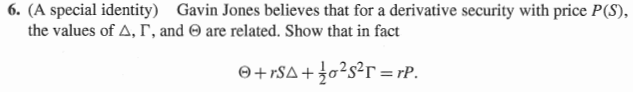

$$ θ + rSΔ + \frac{1}{2}σ^2S^2Γ = rP $$

$$ θ = rP - rSΔ - \frac{1}{2}σ^2S^2Γ $$ 
$$ = r (SN(d_1) - Ke^{-rT}N(d_2)) - rSN(d_1) - \frac{1}{2}σ^2S^2\frac{N'(d_1)}{Sσ\sqrt{T}} \;\; (\; ∵ Δ = N(d_1) \; )$$
$$ = -\frac{SN'(d_1)σ}{2\sqrt{T}} - rKe^{-rT}N(d_2) $$

&nbsp;
 
(sol2 - question)
$$ θ = - \frac{∂C}{∂T} = - \frac{∂(SN(d_1) - Ke^{-rT}N(d_2))}{∂T} = - \frac{∂(SN(d_1))}{∂T} + \frac{∂(Ke^{-rT}N(d_2))}{∂T} $$

$$ = - SN'(d_1)\frac{∂(d_1)}{∂T} + (-rKe^{-rT}N(d_2) + Ke^{-rT}N'(d_2)\frac{∂(d_2)}{∂T} ) $$
$$ = ( - SN'(d_1)\frac{∂(d_1)}{∂T} + Ke^{-rT}N'(d_2)\frac{∂(d_2)}{∂T} ) -rKe^{-rT}N(d_2)  $$
$$ = SN'(d_1)(\frac{∂(d_2)}{∂T} - \frac{∂(d_1)}{∂T}) -rKe^{-rT}N(d_2) \;\; - \; (?) $$
$$ = SN'(d_1)(\frac{∂(d_1 - σ\sqrt{T})}{∂T} - \frac{∂(d_1)}{∂T}) -rKe^{-rT}N(d_2) $$
$$ = -\frac{SN'(d_1)σ}{2\sqrt{T}} - rKe^{-rT}N(d_2) $$

---

### Problem 4.

You have to price a European call option either with a constant volatility 30% or by drawing volatility from a random distribution with a mean of 30%. Which option would be more expensive? (Use Vega to solve the problem.)

### Solution 4.

(Reference from [Textbook] A Practical Guide to Quantitative Finance Interviews : Chapter 6.2 Greeks)

Mathematically, the underlying argument is that the price of a European call option is **a convex function of volatility** and as a result $ c(E[σ]) ≤ E[c(σ)]$, where σ is the random variable representing volatility and e is the call option price. 

&nbsp;

Is the underlying argument correct? It's correct in most, but not all, cases. If the call price e is always a convex function of σ, then $ \frac{∂^2c}{∂σ^2} ≥ 0$. $ \frac{∂c}{∂σ} $ is the Vega of the option. For a European call option, 

$$ ν = \frac{∂c}{∂σ} = S \sqrt{τ}N'(d+1) = \frac{S\sqrt{τ}}{\sqrt{2π}} e^{-\frac{d_1^2}{2}}. $$


The secondary partial derivative is called Volga. For a European call option, 
$$ \frac{∂^2c}{∂σ^2} = \frac{S \sqrt{τ}}{\sqrt{2π}}e^{-\frac{d_1^2}{2}}\frac{d_1d_2}{σ} = ν\frac{d_1d_2}{σ} $$
$ν$ is always positive. For most out-of-the-money call options, both $d_1$ and $d_2$ are negative; for most in-the-money call options, both $d_1$ and $d_2$ are positive. So $d_1d_2 > 0$ in most cases and e is a convex function of a when $d_1d_2 > 0$. 

&nbsp;

But theoretically, we can have conditions that $d_1 > 0$ and $d_2 < 0$ and $ \frac{∂^2c}{∂σ^2}< 0 $ when the option is close to being at-the-money. So the function is not always convex. In those cases, the option with 
constant volatility may have a higher value. 